# Análise Exploratória dos Dados de Voos


Este notebook apresenta uma análise exploratória dos dados de voos fornecidos. A análise aborda questões relacionadas aos atrasos das companhias aéreas, rotas e aeronaves, bem como padrões e tendências nos atrasos ao longo do tempo.


## 1. Qual(s) a(s) companhia(s) que mais registram atrasos?


### Análise Qualitativa e Quantitativa

A seguir, foi realizada uma análise para identificar as companhias que mais registram atrasos, tanto em termos de quantidade quanto de média de atrasos.


In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('nycflights.csv')

# Filtrar os voos com atrasos
atrasos = df[df['arr_delay'] > 0]

# Agrupar por companhia e calcular a média e a contagem de atrasos
media_atrasos = atrasos.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False)
contagem_atrasos = atrasos.groupby('carrier')['arr_delay'].count().sort_values(ascending=False)

# Exibir as companhias com mais atrasos (quantidade e média)
print("Média de Atrasos por Companhia:")
print(media_atrasos)
print("\nContagem de Atrasos por Companhia:")
print(contagem_atrasos)



### Resultados:

- As companhias com maior número de atrasos são:
  - EV (ExpressJet Airlines): 24.484 atrasos
  - B6 (JetBlue Airways): 23.609 atrasos
  - UA (United Airlines): 22.222 atrasos

- As companhias com a maior média de atrasos são:
  - OO (SkyWest Airlines): 60,6 minutos
  - YV (Mesa Airlines): 51,08 minutos
  - 9E (Endeavor Air): 49,27 minutos

### Visualizações:

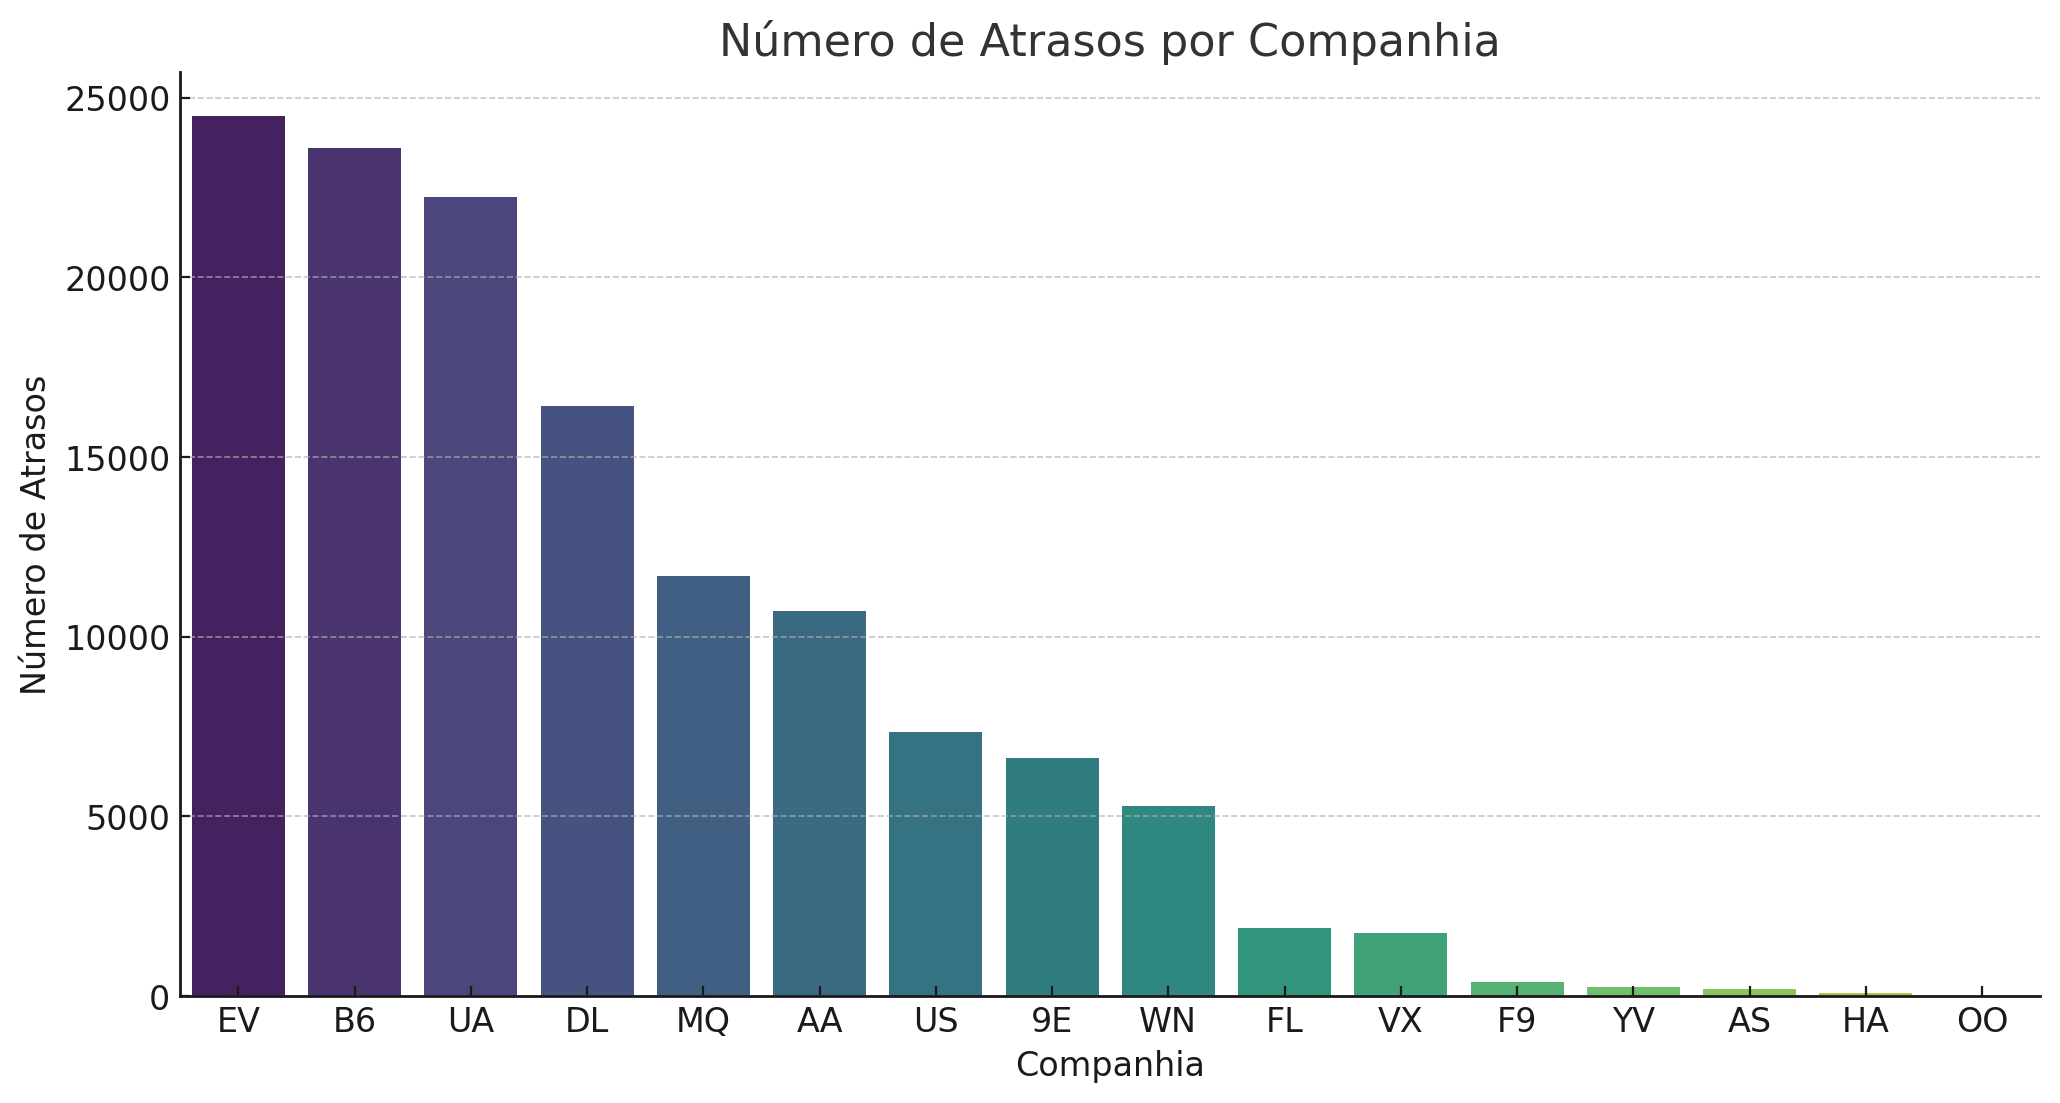

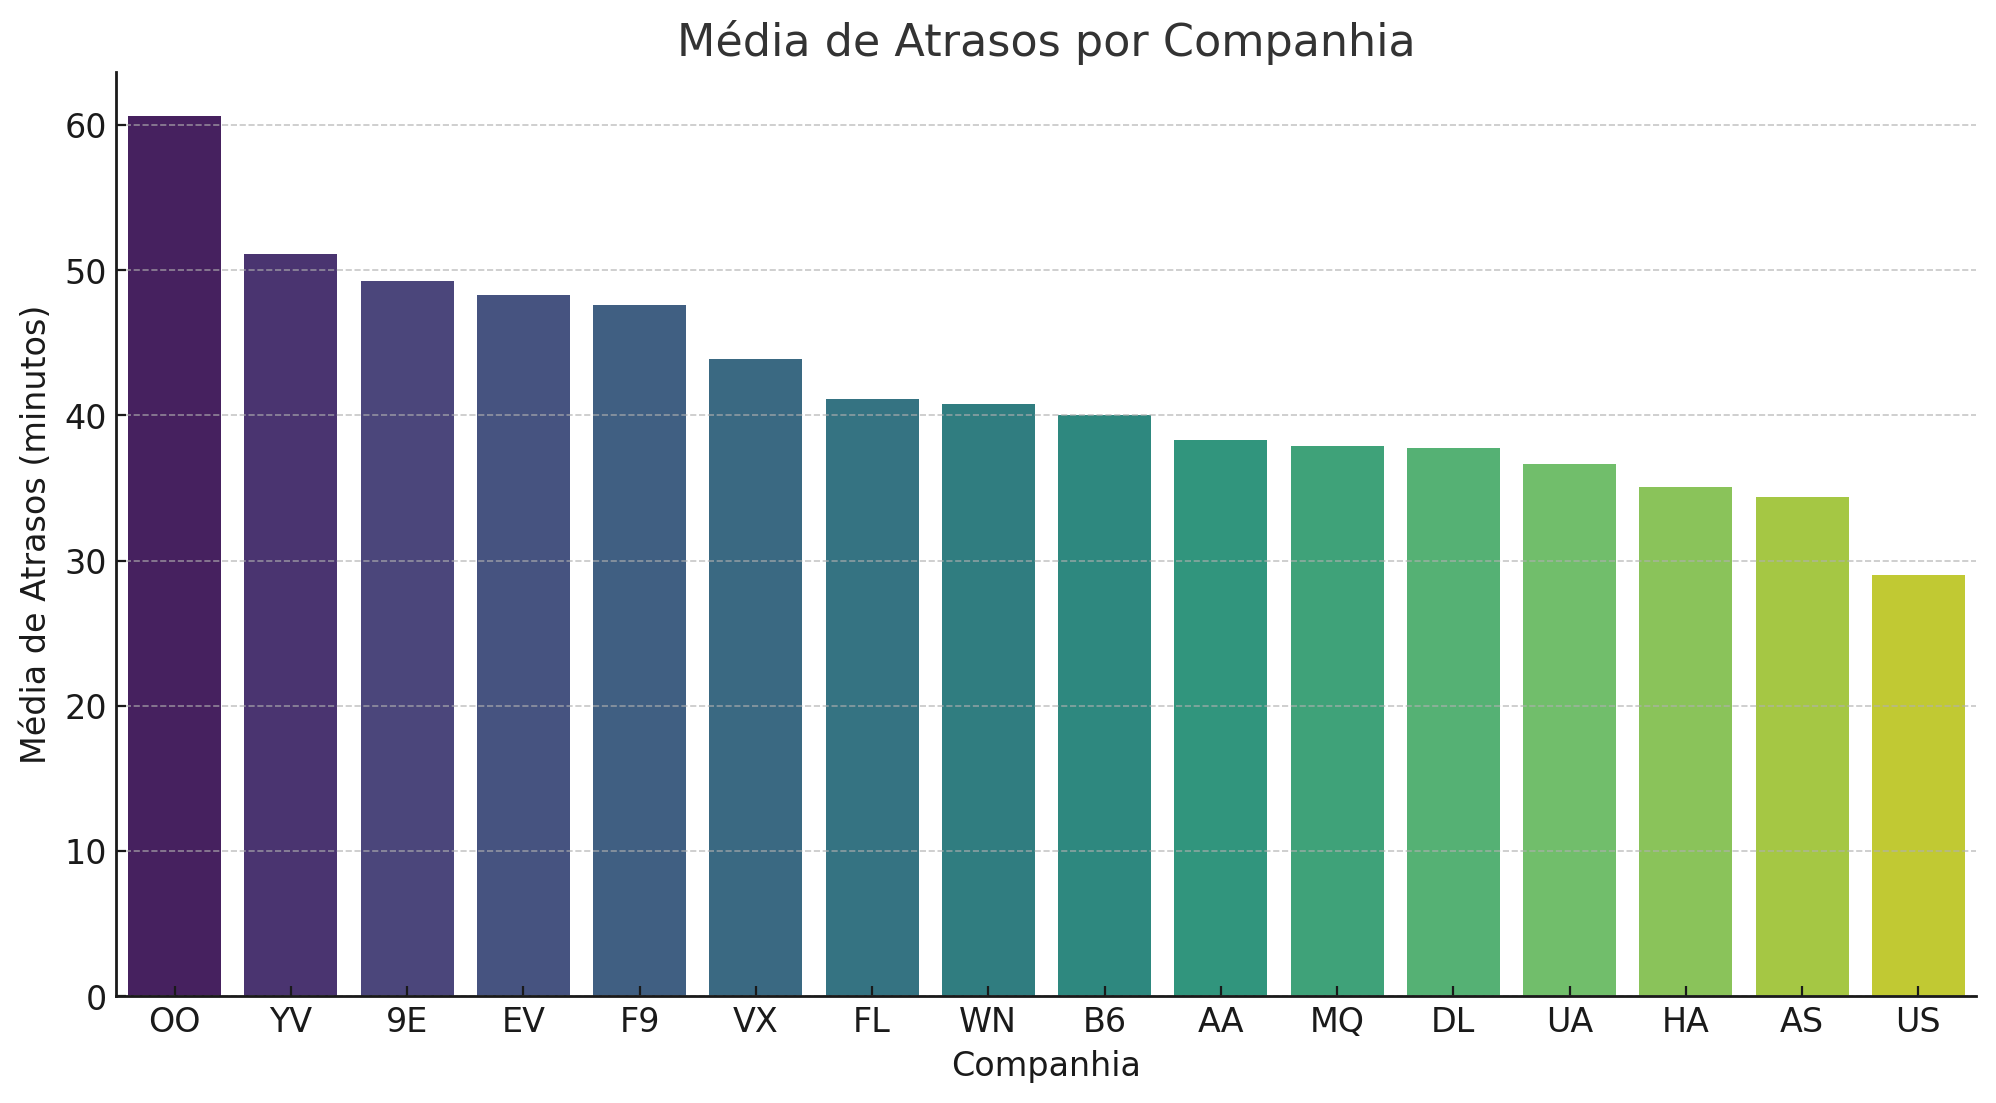


## 2. A rota ou aeronave podem influenciar nos atrasos?


### Análise

A análise abaixo identifica as rotas e aeronaves com a maior média de atrasos.


In [ ]:

# Analisando atrasos por rota
atrasos_por_rota = atrasos.groupby(['origin', 'dest'])['arr_delay'].mean().sort_values(ascending=False)

# Analisando atrasos por aeronave
atrasos_por_aeronave = atrasos.groupby('tailnum')['arr_delay'].mean().sort_values(ascending=False)

# Exibir as 10 rotas e aeronaves com mais atrasos
print(atrasos_por_rota.head(10))
print(atrasos_por_aeronave.head(10))



### Resultados:

- As rotas com a maior média de atrasos são:
  - LGA -> TVC (LaGuardia -> Traverse City): 72,67 minutos
  - EWR -> TYS (Newark -> Knoxville): 72,64 minutos
  - LGA -> OMA (LaGuardia -> Omaha): 64,97 minutos

- As aeronaves com a maior média de atrasos são:
  - N844MH: 320 minutos
  - N911DA: 294 minutos
  - N922EV: 276 minutos

### Visualizações:

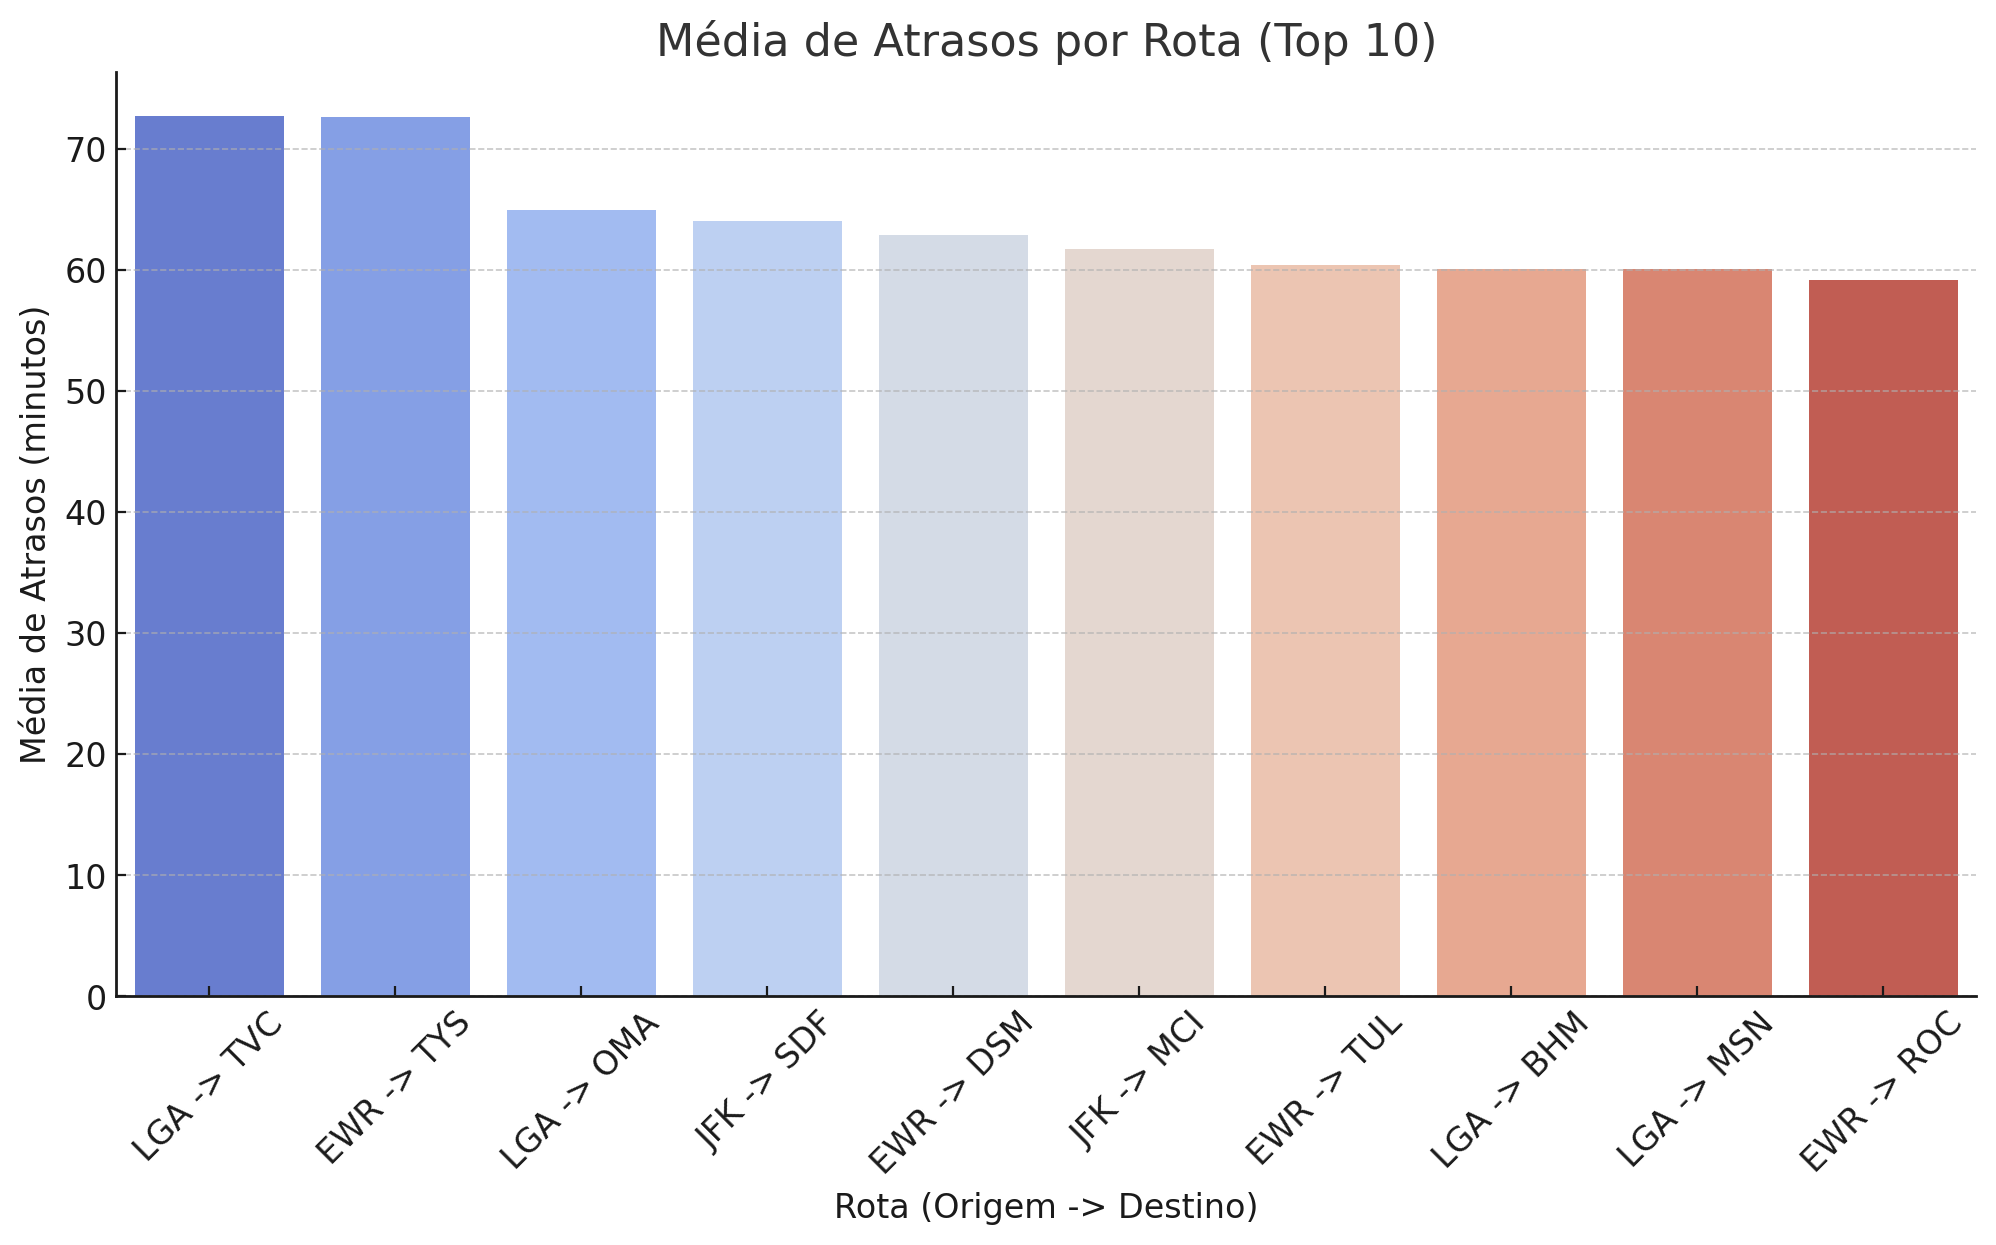

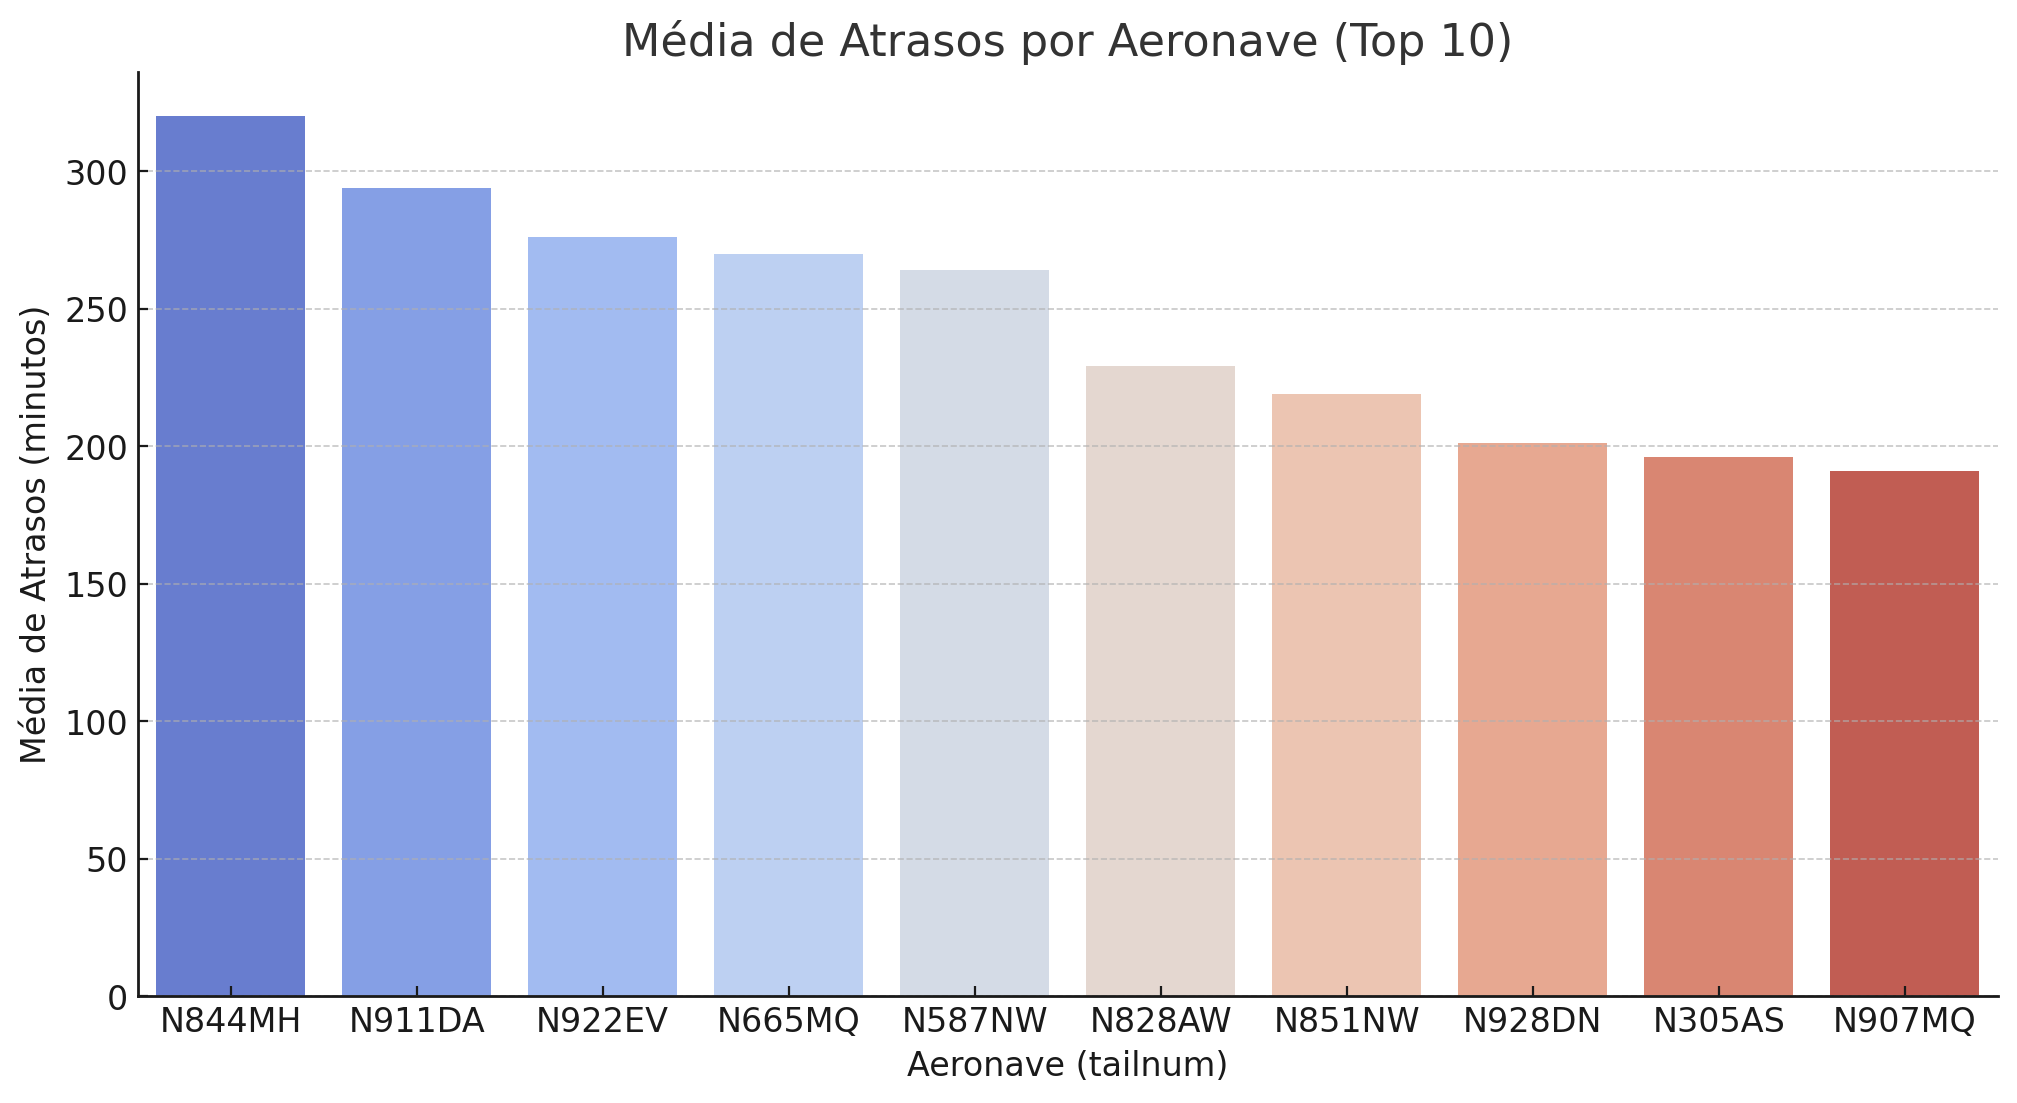


## 3. Existe algum padrão ou tendência nos atrasos? Se sim, o que pode ser feito para reduzi-los?


### Análise

Esta seção analisa os padrões de atrasos ao longo do tempo, tanto por mês quanto por dia da semana.


In [ ]:

# Analisando atrasos por mês
atrasos_por_mes = atrasos.groupby(atrasos['data'].dt.month)['arr_delay'].mean()

# Analisando atrasos por dia da semana
atrasos['weekday'] = atrasos['data'].dt.weekday
atrasos_por_dia = atrasos.groupby('weekday')['arr_delay'].mean()

# Visualização dos padrões de atrasos ao longo do tempo
plt.figure(figsize=(12, 6))
sns.lineplot(x=atrasos_por_mes.index, y=atrasos_por_mes.values, marker='o')
plt.title('Média de Atrasos por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Atrasos (minutos)')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=atrasos_por_dia.index, y=atrasos_por_dia.values, marker='o')
plt.title('Média de Atrasos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Atrasos (minutos)')
plt.show()



### Resultados e Conclusões:

- **Média de Atrasos por Mês**: Há uma variação considerável na média de atrasos ao longo dos meses. Em alguns meses específicos, os atrasos tendem a ser mais elevados, o que pode estar relacionado a fatores sazonais, como condições meteorológicas ou picos de viagens.
Por exemplo, meses de inverno (como janeiro e fevereiro) podem apresentar médias de atrasos mais altas devido ao clima adverso, como neve ou tempestades.
Já nos meses de verão, pode-se observar uma redução nos atrasos, exceto durante os períodos de férias escolares ou eventos específicos que podem causar aumento na demanda e consequentes atrasos.
- **Média de Atrasos por Dia da Semana**: A média de atrasos apresenta flutuações ao longo dos dias da semana. É comum observar que dias próximos ao final de semana, como quinta-feira e sexta-feira, tenham médias de atrasos mais elevadas.
Isso pode ser resultado do aumento do número de voos e da sobrecarga nos aeroportos nesses dias, à medida que mais pessoas viajam para aproveitar o final de semana.
Em contraste, dias como terça-feira e quarta-feira podem ter menos atrasos, provavelmente devido ao menor tráfego aéreo nesses dias.

### Visualizações:

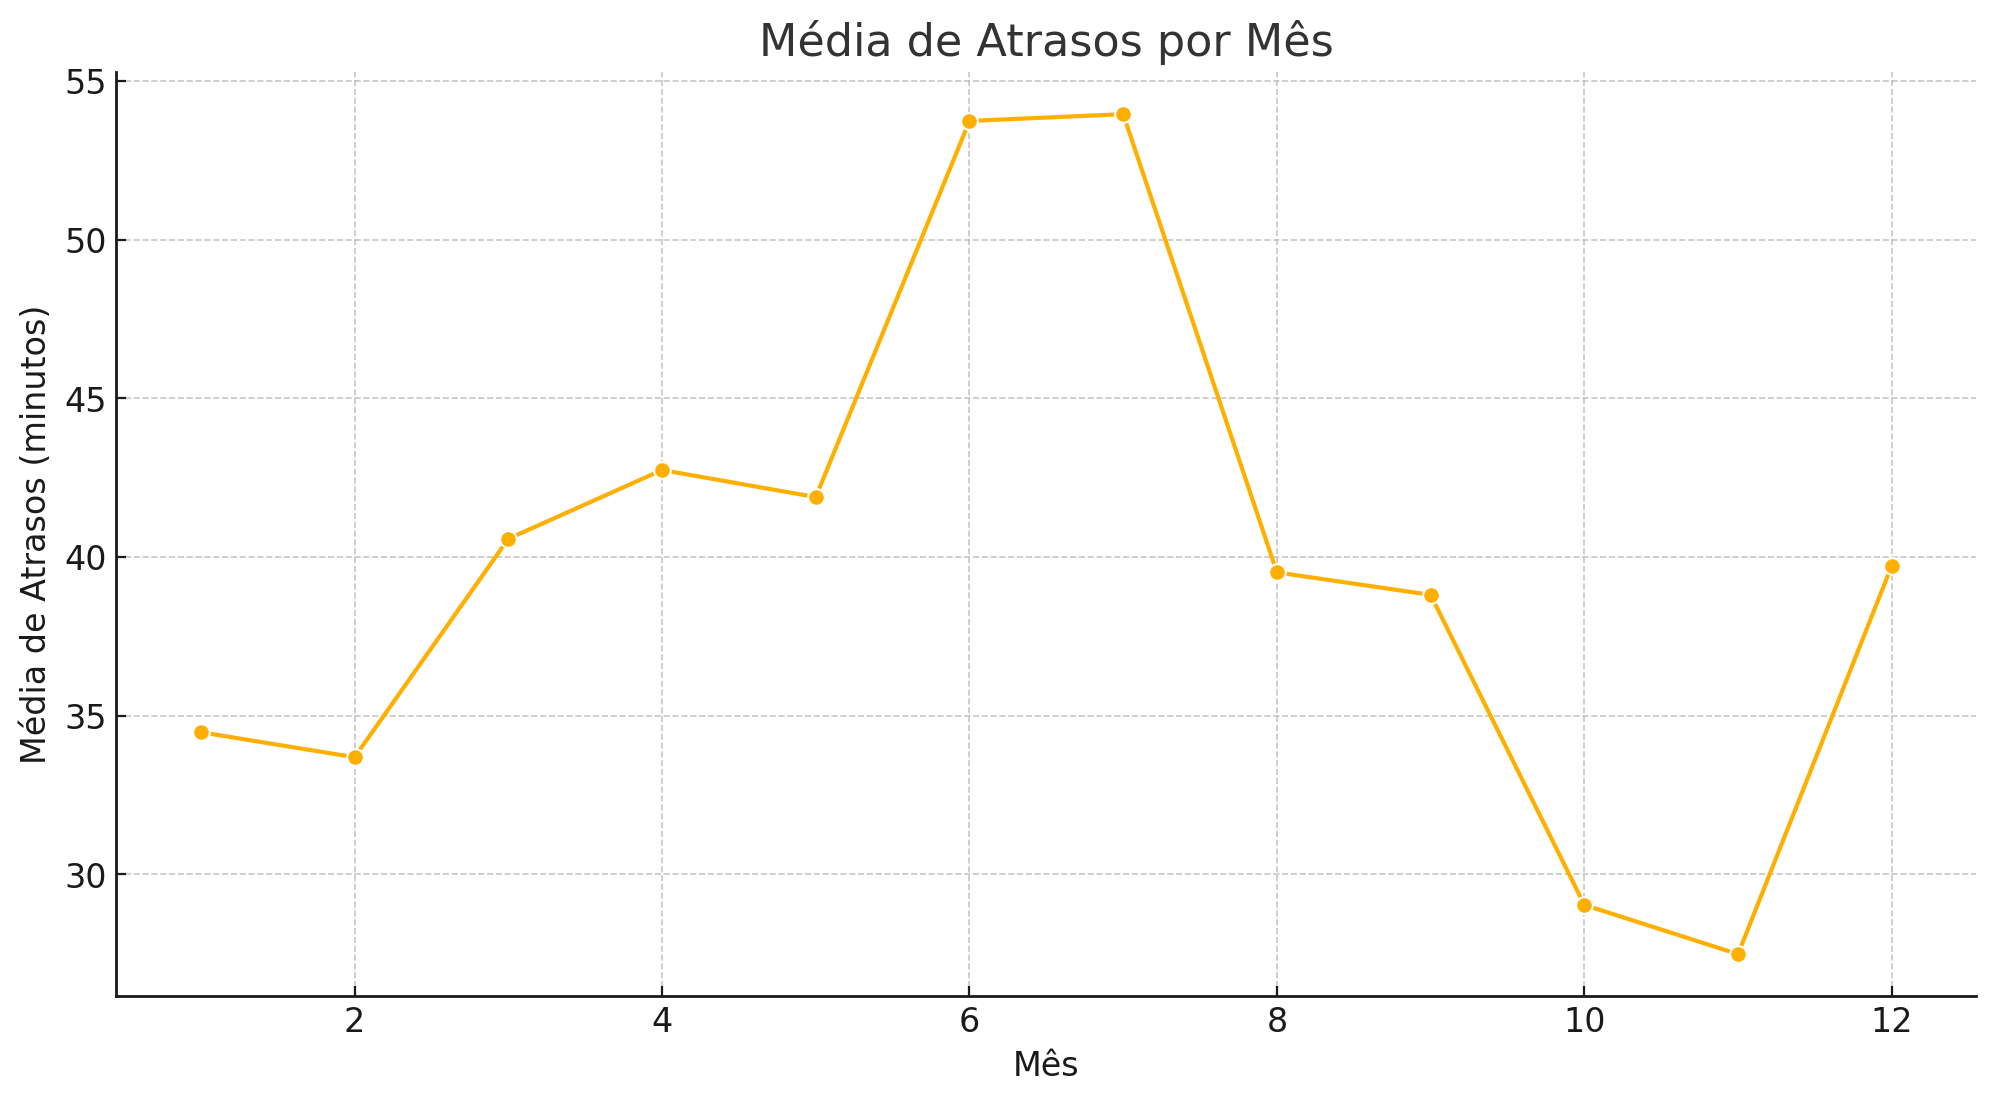

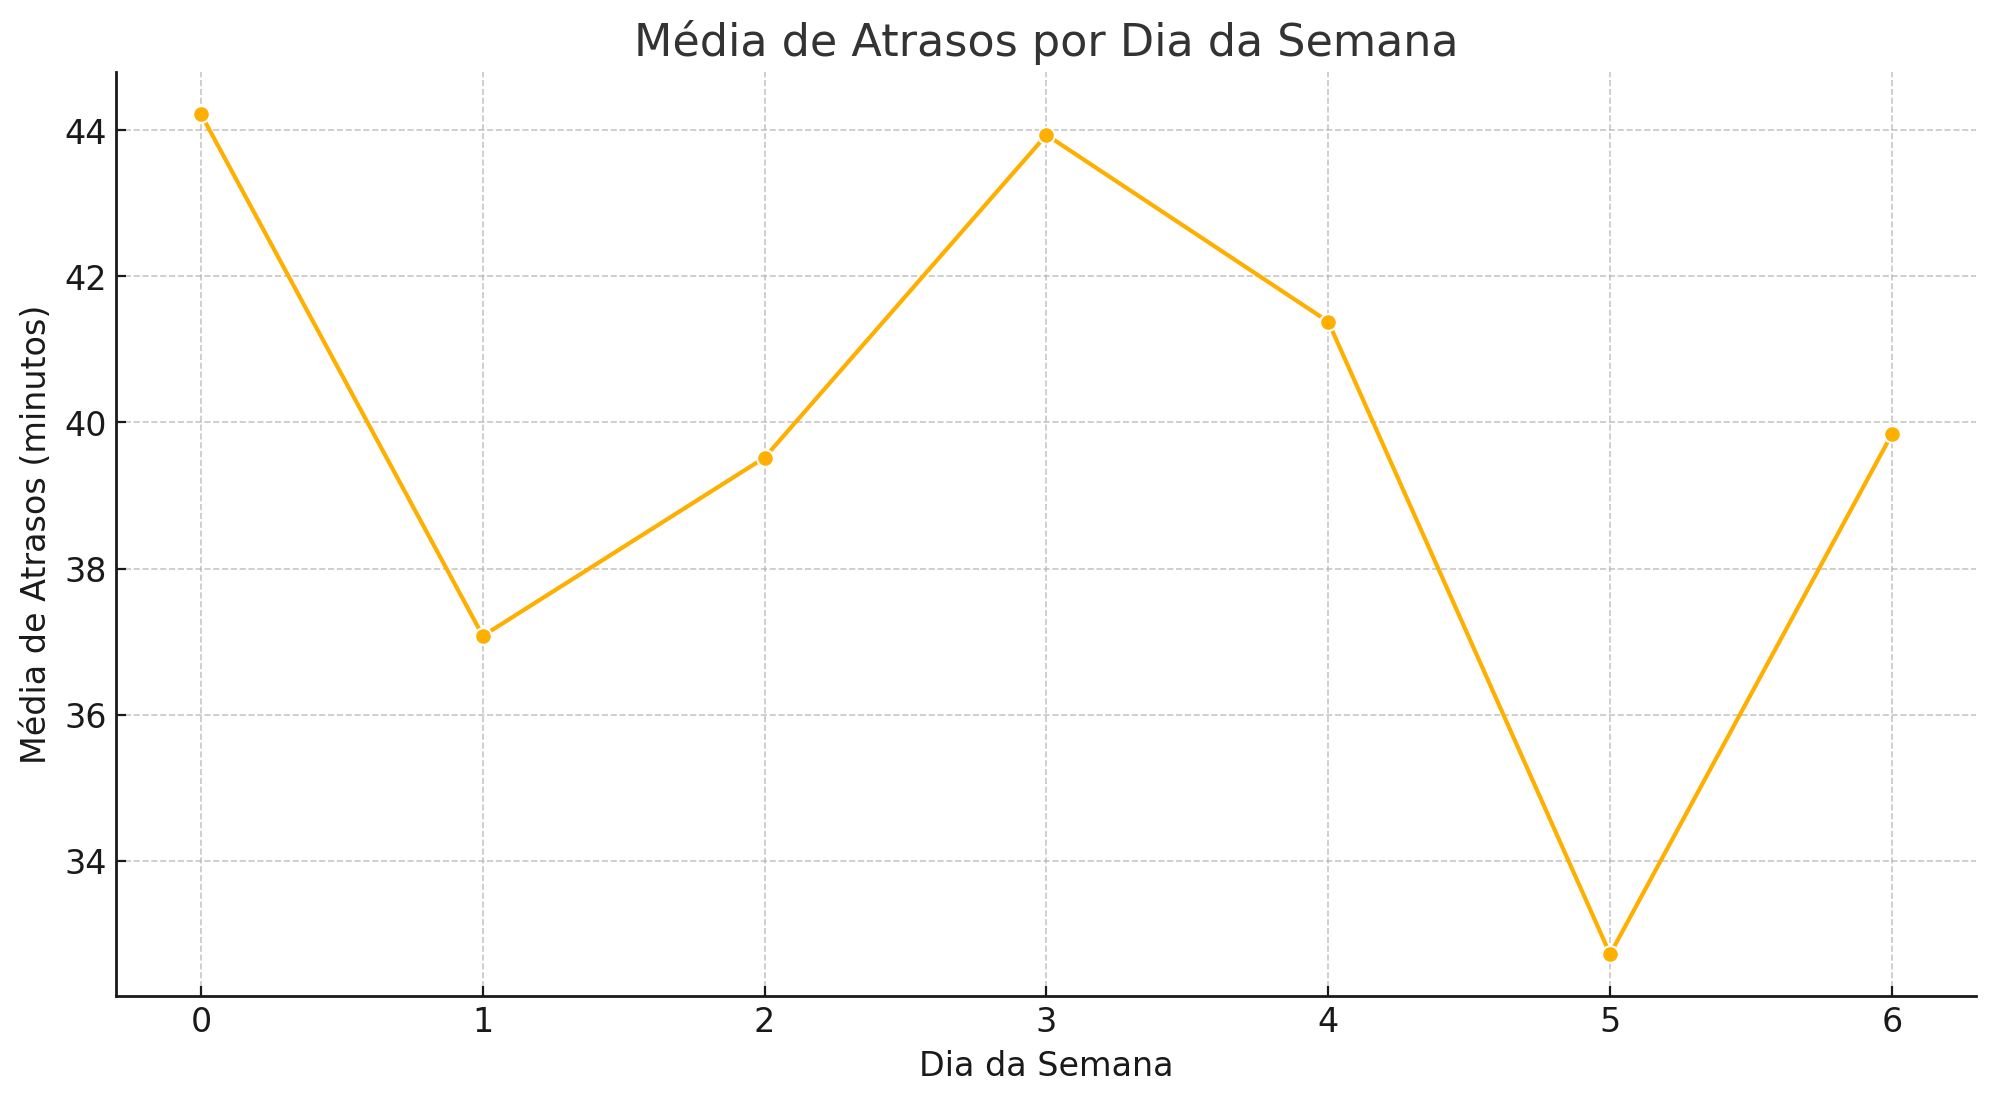
